# Giới thiệu (# Introduction #)

Lần đầu tiếp cận một tập dữ liệu mới đôi khi có thể khiến bạn cảm thấy quá tải. Bạn có thể phải đối mặt với hàng trăm hoặc hàng nghìn đặc trưng (*features*) mà thậm chí không có mô tả nào đi kèm. Bạn nên bắt đầu từ đâu?

Một bước khởi đầu tuyệt vời là tạo một bảng xếp hạng bằng **feature utility metric** (*chỉ số hữu ích của đặc trưng*), một hàm đo lường mối quan hệ giữa một đặc trưng và *target* (*biến mục tiêu*). Sau đó, bạn có thể chọn ra một tập hợp nhỏ hơn các đặc trưng hữu ích nhất để phát triển ban đầu, đồng thời có thêm sự tự tin rằng thời gian của bạn sẽ được sử dụng hiệu quả.

Chỉ số mà chúng ta sẽ sử dụng được gọi là *mutual information* (*thông tin tương hỗ*). Mutual information tương tự như *correlation* (*tương quan*) vì nó đo lường mối quan hệ giữa hai đại lượng. Tuy nhiên, lợi thế của mutual information là nó có thể phát hiện *bất kỳ* dạng quan hệ nào, trong khi *correlation* chỉ phát hiện các quan hệ *tuyến tính*.

Mutual information là một chỉ số đa dụng tuyệt vời, đặc biệt hữu ích trong giai đoạn đầu của quá trình phát triển đặc trưng khi bạn có thể chưa biết sẽ sử dụng mô hình nào. Nó có các ưu điểm sau:
- Dễ sử dụng và dễ diễn giải,
- Hiệu quả về mặt tính toán,
- Có cơ sở lý thuyết vững chắc,
- Chống overfitting (*quá khớp*),
- Có thể phát hiện bất kỳ loại quan hệ nào.

# Mutual Information và ý nghĩa của nó (# Mutual Information and What it Measures #)

Mutual information mô tả mối quan hệ theo khía cạnh *độ bất định* (*uncertainty*). **Mutual information** (*MI*) giữa hai đại lượng đo lường mức độ mà kiến thức về một đại lượng có thể giảm bớt sự bất định về đại lượng còn lại. Nếu bạn biết giá trị của một đặc trưng, bạn sẽ tự tin hơn bao nhiêu về giá trị của *target*?

Dưới đây là một ví dụ từ tập dữ liệu *Ames Housing*. Hình minh họa mối quan hệ giữa chất lượng bên ngoài của một ngôi nhà (*exterior quality*) và giá bán của nó. Mỗi điểm trên biểu đồ đại diện cho một ngôi nhà.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/X12ARUK.png" width=400, alt="Bốn hạng mục ExterQual: Fair, Typical, Good, Excellent. Biểu đồ phân tán của SalePrice trong từng hạng mục.">
<figcaption style="textalign: center; font-style: italic"><center>Biết được chất lượng bên ngoài của một ngôi nhà giúp giảm sự bất định về giá bán của nó.</center></figcaption>
</figure>

Từ hình trên, ta có thể thấy rằng biết giá trị của `ExterQual` giúp bạn dự đoán `SalePrice` chính xác hơn — mỗi hạng mục `ExterQual` tập trung `SalePrice` trong một phạm vi nhất định. Mutual information giữa `ExterQual` và `SalePrice` là mức độ trung bình mà `ExterQual` giúp giảm sự bất định của `SalePrice`, xét trên bốn giá trị của `ExterQual`. Chẳng hạn, vì `Fair` xuất hiện ít hơn `Typical`, nên `Fair` sẽ có trọng số nhỏ hơn trong điểm số MI.

(**Ghi chú kỹ thuật**: Khái niệm "độ bất định" trong ngữ cảnh này được đo bằng một đại lượng trong lý thuyết thông tin được gọi là *entropy*. Entropy của một biến có thể hiểu nôm na là: "trung bình bạn cần bao nhiêu câu hỏi *có-không* để mô tả một giá trị của biến đó". Càng cần nhiều câu hỏi, bạn càng ít chắc chắn về biến đó. Mutual information đo lường số câu hỏi mà một đặc trưng có thể trả lời về biến mục tiêu.)

# Diễn giải điểm số Mutual Information (# Interpreting Mutual Information Scores #)

Giá trị nhỏ nhất có thể có của mutual information giữa hai đại lượng là 0.0. Khi MI bằng 0, hai đại lượng là độc lập: không đại lượng nào cung cấp thông tin về đại lượng kia. Ngược lại, về lý thuyết, MI không có giới hạn trên. Tuy nhiên, trên thực tế, các giá trị trên 2.0 là hiếm gặp. (*Mutual information là một đại lượng theo thang đo logarit, vì vậy nó tăng rất chậm.*)

Hình tiếp theo sẽ giúp bạn hình dung về cách các giá trị MI tương ứng với mức độ và loại mối quan hệ giữa một đặc trưng và *target*.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Dt75E1f.png" width=800, alt="Biểu đồ minh họa mức độ tăng MI khi phụ thuộc giữa feature và target tăng.">
<figcaption style="textalign: center; font-style: italic"><center><strong>Bên trái:</strong> Mutual information tăng khi mối liên hệ giữa đặc trưng và biến mục tiêu trở nên chặt chẽ hơn. <strong>Bên phải:</strong> Mutual information có thể nắm bắt mọi loại quan hệ (không chỉ tuyến tính như correlation).</center></figcaption>
</figure>

Dưới đây là một số điều cần nhớ khi áp dụng mutual information:
- MI giúp bạn hiểu được *tiềm năng tương đối* của một đặc trưng khi làm predictor (*biến dự báo*) cho biến mục tiêu, nếu xét riêng lẻ.
- Một đặc trưng có thể rất hữu ích khi kết hợp với các đặc trưng khác nhưng không có giá trị nhiều khi xét riêng lẻ. MI *không thể phát hiện* sự tương tác giữa các đặc trưng, vì nó là một chỉ số **univariate** (*đơn biến*).
- *Tính hữu ích thực sự* của một đặc trưng *phụ thuộc vào mô hình bạn sử dụng*. Một đặc trưng chỉ hữu ích nếu mối quan hệ của nó với biến mục tiêu là thứ mà mô hình của bạn có thể học được. Chỉ vì một đặc trưng có điểm MI cao không có nghĩa là mô hình sẽ tận dụng được nó. Bạn có thể cần biến đổi đặc trưng để làm rõ mối quan hệ.

# Ví dụ - Ô tô năm 1985 (# Example - 1985 Automobiles #)

Tập dữ liệu [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) bao gồm 193 chiếc ô tô thuộc năm sản xuất 1985. Mục tiêu của tập dữ liệu này là dự đoán `price` (*giá xe*, tức biến mục tiêu) dựa trên 23 đặc trưng của xe, chẳng hạn như `make` (*hãng xe*), `body_style` (*kiểu dáng thân xe*), và `horsepower` (*mã lực*). Trong ví dụ này, chúng ta sẽ xếp hạng các đặc trưng dựa trên mutual information và kiểm tra kết quả thông qua trực quan hóa dữ liệu.

Ô ẩn dưới đây nhập các thư viện và tải tập dữ liệu.

In [34]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Đọc dữ liệu và thay thế '?' bằng NaN, sau đó loại bỏ tất cả các hàng chứa NaN
df = pd.read_csv("Automobile_data.csv", na_values=['?']).dropna()

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


Thuật toán *scikit-learn* cho *mutual information* (*MI*) xử lý các đặc trưng rời rạc (*discrete features*) khác với các đặc trưng liên tục (*continuous features*). Do đó, bạn cần chỉ định loại của từng đặc trưng.  

Một quy tắc đơn giản là: bất kỳ đặc trưng nào *bắt buộc* phải có kiểu dữ liệu `float` thì *không* phải là đặc trưng rời rạc. Các đặc trưng phân loại (*categoricals*, có kiểu dữ liệu `object` hoặc `categorical`) có thể được xử lý như đặc trưng rời rạc bằng cách sử dụng *label encoding*. (Bạn có thể xem lại cách *label encoding* trong bài học [Categorical Variables](http://www.kaggle.com/alexisbcook/categorical-variables).)

In [35]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

Scikit-learn có hai chỉ số *mutual information* trong module `feature_selection`: một dành cho biến mục tiêu dạng số thực (*real-valued targets*), gọi là `mutual_info_regression`, và một dành cho biến mục tiêu phân loại (*categorical targets*), gọi là `mutual_info_classif`.  

Trong trường hợp này, biến mục tiêu `price` là một giá trị thực (*real-valued*). Ô dưới đây sẽ tính điểm MI (*mutual information scores*) cho các đặc trưng của chúng ta và hiển thị kết quả trong một *dataframe* gọn gàng.

In [36]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb-weight     1.541276
engine-size     0.855648
length          0.707906
fuel-system     0.468896
stroke          0.283028
peak-rpm        0.218383
aspiration      0.119680
body-style      0.055365
num-of-doors    0.000000
Name: MI Scores, dtype: float64

Và bây giờ, một biểu đồ cột (*bar plot*) để giúp so sánh dễ dàng hơn:

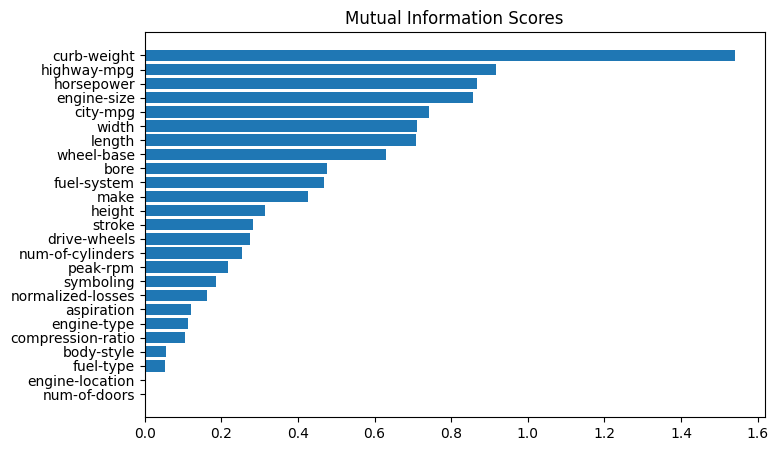

In [37]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Trực quan hóa dữ liệu (*data visualization*) là một bước tiếp theo tuyệt vời sau khi xếp hạng đặc trưng (*utility ranking*). Hãy xem xét kỹ hơn một vài đặc trưng trong số này.

Như chúng ta có thể mong đợi, đặc trưng `curb_weight` có điểm MI cao thể hiện mối quan hệ chặt chẽ với `price`, biến mục tiêu (*target*).

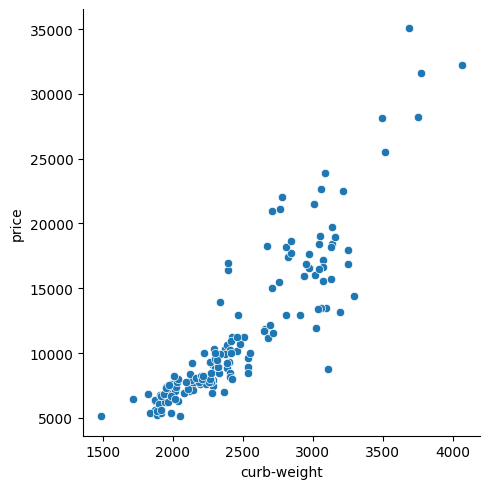

In [38]:
sns.relplot(x="curb-weight", y="price", data=df);

Đặc trưng `fuel_type` có điểm MI khá thấp, nhưng như chúng ta có thể thấy từ biểu đồ, nó rõ ràng phân tách hai nhóm `price` với các xu hướng khác nhau trong đặc trưng `horsepower`. Điều này cho thấy rằng `fuel_type` tạo ra một *interaction effect* (*hiệu ứng tương tác*), và có thể không phải là một đặc trưng không quan trọng như chúng ta nghĩ ban đầu.

Trước khi quyết định một đặc trưng là không quan trọng chỉ dựa vào điểm MI của nó, nên kiểm tra xem có bất kỳ *interaction effect* nào không—kiến thức chuyên ngành (*domain knowledge*) có thể cung cấp rất nhiều gợi ý hữu ích trong trường hợp này.

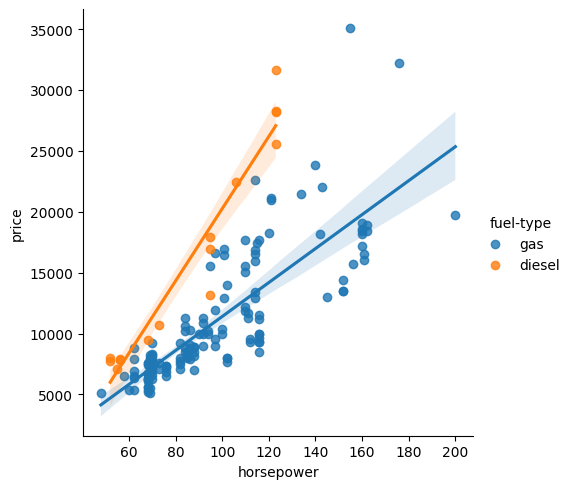

In [39]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df);

Trực quan hóa dữ liệu (*data visualization*) là một công cụ tuyệt vời trong bộ công cụ *feature engineering* (*kỹ thuật đặc trưng*). Cùng với các chỉ số hữu ích như *mutual information*, các biểu đồ trực quan như thế này có thể giúp bạn khám phá những mối quan hệ quan trọng trong dữ liệu của mình. Hãy xem khóa học [Data Visualization](https://www.kaggle.com/learn/data-visualization) để tìm hiểu thêm!

# Đến lượt bạn! (# Your Turn #)

[**Xếp hạng các đặc trưng**](https://www.kaggle.com/kernels/fork/14393925) của tập dữ liệu *Ames Housing* và chọn bộ đặc trưng đầu tiên để bắt đầu phát triển.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*